## Compare the performance of the scikit and the custom random forest classifiers

Tested on the Wine Quality dataset from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wine+quality

## Import of the dataset

In [20]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')
print("Dataset Classes:")
print(data.iloc[:,-1].unique())
data

Dataset Classes:
[5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split the dataset into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

x = data.drop(columns="quality")
y = data["quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Comparison of the performance of the forest classifiers
### 1) Compare on predefined parameters

In [22]:
from sklearn.ensemble import RandomForestClassifier
from random_forest import CustomRandomForestClassifier

print("Forest Classifier Comparison for overfit parameters")
print("------------------------------------------------------")

scikit_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
# Calculate average accuracy for scikit-learn forest as it changes with every fit
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("------------------------------------------------------")
print("Test data accuracy:                              ", "{:.2f}".format(scikit_score))
# Train data accuracy should be the same for every fit
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(scikit_train_score))
print("------------------------------------------------------")

custom_model_scikit_tree = CustomRandomForestClassifier(n_estimators=100, max_depth=15, tree_type="scikit")
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("------------------------------------------------------")
print("Test data accuracy:                              ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("------------------------------------------------------")

custom_model_custom_tree = CustomRandomForestClassifier(n_estimators=100, max_depth=15, tree_type="custom")
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)
print("Custom forest        |   Custom tree")
print("------------------------------------------------------")
print("Test data accuracy:                              ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("------------------------------------------------------")


Forest Classifier Comparison for overfit parameters
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
------------------------------------------------------
Test data accuracy:                               0.65
Train data accuracy                               1.00
------------------------------------------------------
Custom forest        |   Scikit-learn tree
------------------------------------------------------
Test data accuracy:                               0.63
Train data accuracy                               1.00
------------------------------------------------------
Custom forest        |   Custom tree
------------------------------------------------------
Test data accuracy:                               0.64
Train data accuracy                               1.00
------------------------------------------------------


In [121]:
print("Forest Classifier Comparison for random parameters")
print("------------------------------------------------------")
print("max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6")
print("------------------------------------------------------")

scikit_model = RandomForestClassifier(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, random_state=42, max_features='sqrt')
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data accuracy:                      ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(scikit_train_score))
print("------------------------------------------------------")

custom_model_scikit_tree = CustomRandomForestClassifier(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="scikit", max_features='sqrt')
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data accuracy:                      ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("------------------------------------------------------")

custom_model_custom_tree = CustomRandomForestClassifier(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="custom", max_features='sqrt')
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)
print("Custom forest        |   Custom tree")
print("------------------------------------------------------")
print("Average test data accuracy:                      ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data accuracy                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("------------------------------------------------------")


Forest Classifier Comparison for random parameters
------------------------------------------------------
max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
------------------------------------------------------
Average test data accuracy:                       0.54
Train data accuracy                               0.62
------------------------------------------------------
Custom forest        |   Scikit-learn tree
------------------------------------------------------
Average test data accuracy:                       0.56
Train data accuracy                               0.60
------------------------------------------------------
Custom forest        |   Custom tree
------------------------------------------------------
Average test data accuracy:                       0.54
Train data accuracy                               0.60
------------------------------------------

### 2) Compare on the best parameters obtained by hyperparameter tuning

#### Hyperparameter space

In [129]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 31, 2))
params['min_samples_split'] = list(range(2, 7))
params['min_samples_leaf'] = list(range(1, 6))
params['n_estimators'] = [100]
params['n_jobs'] = [-1]
params['max_features'] = ['sqrt'] # sqrt was empirically found to be the best for classification tasks
                                   # is therefore not considered a hyperparameter
print(params)

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5], 'n_estimators': [100], 'n_jobs': [-1], 'max_features': ['sqrt']}


In [34]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True)

#### Initialize Optimizer

In [122]:
from fast_parameter_search import RandomForestGridSearchTuning

scikit_clf = RandomForestClassifier()
# add random state to make the results reproducible
scikit_params = params.copy()
scikit_params['random_state'] = [42]
scikit_params['oob_score'] = [True]
scikit_search = RandomForestGridSearchTuning(model=scikit_clf, param_grid=scikit_params, n_jobs=-1)

custom_clf_scikit = CustomRandomForestClassifier()
custom_params_scikit = params.copy()
custom_params_scikit['tree_type'] = ['scikit']
custom_search_scikit = RandomForestGridSearchTuning(custom_clf_scikit, custom_params_scikit, n_jobs=-1)

custom_clf_custom = CustomRandomForestClassifier()
custom_params_custom = params.copy()
custom_params_custom['tree_type'] = ['custom']
custom_search_custom = RandomForestGridSearchTuning(custom_clf_custom, custom_params_custom, n_jobs=-1)


#### Results

In [123]:
#Scikit Learn Forest | Scikit Learn Tree
scikit_search.fit(x_train, y_train)
print("Scikit Learn Forest | Scikit Learn Tree")
print("Best score", scikit_search.best_score)
print("Best parameters", scikit_search.best_params)

# Custom Forest | Scikit Learn Tree
custom_search_scikit.fit(x_train, y_train)
print("Custom Forest | Scikit Learn Tree")
print("Best score", custom_search_scikit.best_score)
print("Best parameters", custom_search_scikit.best_params)

# Custom Forest | Custom Tree
custom_search_custom.fit(x_train, y_train)
print("Custom Forest | Custom Tree")
print("Best score", custom_search_custom.best_score)
print("Best parameters", custom_search_custom.best_params)


Scikit Learn Forest | Scikit Learn Tree
Best score 0.7075840500390931
Best parameters {'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'random_state': 42, 'oob_score': True}
Custom Forest | Scikit Learn Tree
Best score 0.7146207974980453
Best parameters {'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'tree_type': 'scikit'}
Custom Forest | Custom Tree
Best score 0.7099296325254105
Best parameters {'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'tree_type': 'custom'}


In [126]:
from sklearn.metrics import accuracy_score

best_scikit_model = scikit_search.best_estimator
best_scikit_model.fit(x_train, y_train)
y_pred_scikit = best_scikit_model.predict(x_test)
scikit_accuracy = accuracy_score(y_test, y_pred_scikit)

best_custom_scikit_model = custom_search_scikit.best_estimator
best_custom_scikit_model.fit(x_train, y_train)
y_pred_custom_scikit = best_custom_scikit_model.predict(x_test)
custom_scikit_accuracy = accuracy_score(y_test, y_pred_custom_scikit)

best_custom_custom_model = custom_search_custom.best_estimator
best_custom_custom_model.fit(x_train, y_train)
y_pred_custom_custom = best_custom_custom_model.predict(x_test)
custom_custom_accuracy = accuracy_score(y_test, y_pred_custom_custom)

print("Tree Classifier Comparison for best parameters")
print("---------------------------------------------------------")
print("Scikit Forest - Scikit Tree accuracy on test data:   ", "{:.2f}".format(scikit_accuracy))
print("Custom Forest - Scikit Tree accuracy on test data:   ", "{:.2f}".format(custom_scikit_accuracy))
print("Custom Forest - Custom Tree accuracy on test data:   ", "{:.2f}".format(custom_custom_accuracy))


Tree Classifier Comparison for best parameters
---------------------------------------------------------
Scikit Forest - Scikit Tree accuracy on test data:    0.67
Custom Forest - Scikit Tree accuracy on test data:    0.66
Custom Forest - Custom Tree accuracy on test data:    0.68


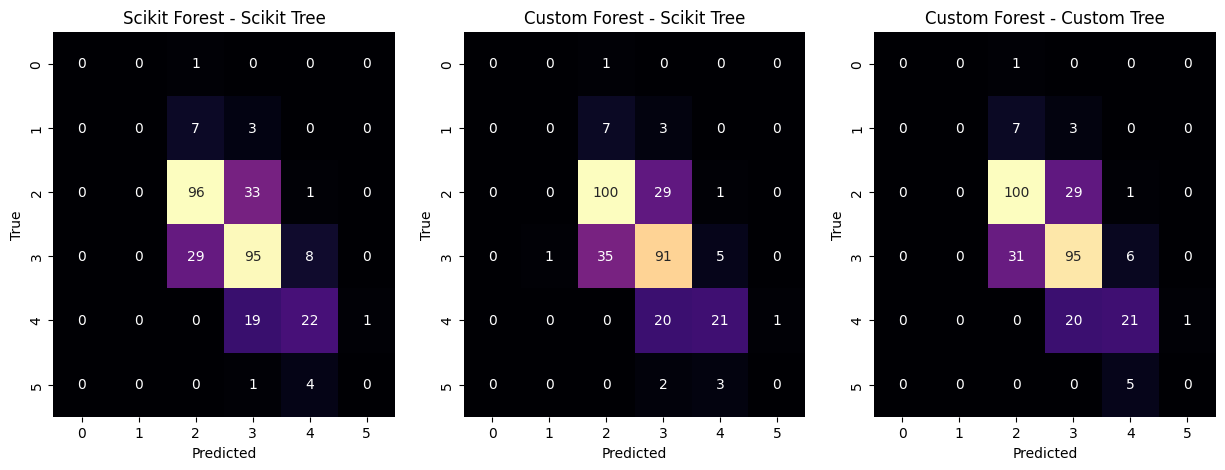

In [128]:
# Plot confusion matrices of the three models next to each other

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

scikit_cm = confusion_matrix(y_test, y_pred_scikit)
sns.heatmap(scikit_cm, annot=True, fmt='d', ax=axs[0], cmap="magma", cbar=False)
axs[0].set_title('Scikit Forest - Scikit Tree')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

custom_scikit_cm = confusion_matrix(y_test, y_pred_custom_scikit)
sns.heatmap(custom_scikit_cm, annot=True, fmt='d', ax=axs[1], cmap="magma", cbar=False)
axs[1].set_title('Custom Forest - Scikit Tree')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

custom_custom_cm = confusion_matrix(y_test, y_pred_custom_custom)
sns.heatmap(custom_custom_cm, annot=True, fmt='d', ax=axs[2], cmap="magma", cbar=False)
axs[2].set_title('Custom Forest - Custom Tree')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')


plt.show()